# Group Activity Week8 on Testing of Hypothesis

**1. Carry out descriptive analytics on the dataset.**


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
marks_data=pd.read_csv('Week_8_Q&A_dataset - Sheet1.csv')

In [8]:
marks_data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [12]:
marks_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [28]:
marks_data.isna().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [11]:
marks_data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [13]:
marks_data.shape

(28, 3)

In [19]:
marks_data.describe

<bound method NDFrame.describe of     Gender Test preparation  Total Marks
0     male             none           14
1   female             none           28
2   female             none           18
3   female             none           48
4   female             none           21
5   female        completed           40
6     male             none           30
7   female             none           12
8     male             none           18
9     male             none           24
10    male        completed           44
11    male             none           23
12    male        completed           43
13    male             none           28
14  female             none           41
15  female             none           13
16  female        completed           48
17  female             none           45
18    male             none           47
19    male             none           36
20    male             none           14
21    male        completed           44
22  female             

In [22]:
import warnings
warnings.filterwarnings("ignore")

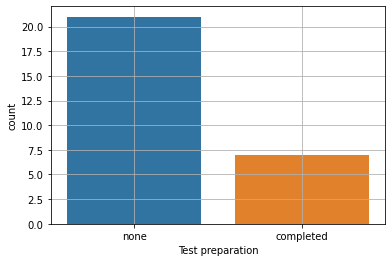

In [26]:
sns.countplot(marks_data['Test preparation'])
plt.grid()


**2. Check whether female and male students scored the same marks.**

In [29]:
gender_group=marks_data.groupby(['Gender'])

In [35]:
M=gender_group.get_group('male')
M

,Gender,Test preparation,Total Marks
0,male,none,14
6,male,none,30
8,male,none,18
9,male,none,24
10,male,completed,44
11,male,none,23
12,male,completed,43
13,male,none,28
18,male,none,47
19,male,none,36


In [37]:
F=gender_group.get_group('female')
F

,Gender,Test preparation,Total Marks
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
7,female,none,12
14,female,none,41
15,female,none,13
16,female,completed,48
17,female,none,45


In [41]:
Mm=M['Total Marks']
Mm

0     14
6     30
8     18
9     24
10    44
11    23
12    43
13    28
18    47
19    36
20    14
21    44
Name: Total Marks, dtype: int64

In [52]:
Mm.shape

(12,)

In [43]:
Fm=F['Total Marks']
Fm

1     28
2     18
3     48
4     21
5     40
7     12
14    41
15    13
16    48
17    45
22    41
23    27
24    27
25    38
26    50
27    43
Name: Total Marks, dtype: int64

In [53]:
Fm.shape

(16,)

In [48]:
M_mean=np.mean(Mm)
F_mean=np.mean(Fm)
print("Mean Total Marks of male students is %0.2f"%M_mean)
print("Mean Total Marks of female students is %0.2f"%F_mean)

Mean Total Marks of male students is 30.42
Mean Total Marks of female students is 33.75


In [49]:
Mm_std=np.std(Mm)
Fm_std=np.std(Fm)
print("Standard deviation of Total Marks of male students is %0.2f"%Mm_std)
print("Standard deviation of Total Marks of female students is %0.2f"%Fm_std)

Standard deviation of Total Marks of male students is 11.65
Standard deviation of Total Marks of female students is 12.46


**Null hypothesis:H0=The mean marks of male and female students are not significantly different.**

**Alternate hypothesis:H1=The mean marks of male and female students are significantly different.**

**Let significance level=0.05**

In [58]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(Mm,Fm)

In [55]:
print("P-value is %0.2f"%pval )

P-value is 0.49


In [60]:
if pval <0.025:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

we accept null hypothesis


**That implies that we favours the null hypothesis which says that the mean marks of male and female students are not significantly different.**

**3. Whether test preparation helps the students**

In [66]:
test_prep=marks_data.groupby(['Test preparation'])

In [67]:
none_group=test_prep.get_group('none')
none_group

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24
11,male,none,23


In [69]:
completed_group=test_prep.get_group('completed')
completed_group

,Gender,Test preparation,Total Marks
5,female,completed,40
10,male,completed,44
12,male,completed,43
16,female,completed,48
21,male,completed,44
26,female,completed,50
27,female,completed,43


In [70]:
Nm=none_group['Total Marks']
Nm

0     14
1     28
2     18
3     48
4     21
6     30
7     12
8     18
9     24
11    23
13    28
14    41
15    13
17    45
18    47
19    36
20    14
22    41
23    27
24    27
25    38
Name: Total Marks, dtype: int64

In [71]:
Cm=completed_group['Total Marks']
Cm

5     40
10    44
12    43
16    48
21    44
26    50
27    43
Name: Total Marks, dtype: int64

In [73]:
Nm_mean=np.mean(Nm)
Cm_mean=np.mean(Cm)
print("The mean total marks of students who had not completed test preparation is %0.02f"%Nm_mean)
print("The mean total marks of students who completed test preparation is %0.02f"%Cm_mean)

The mean total marks of students who had not completed test preparation is 28.24
The mean total marks of students who completed test preparation is 44.57


In [75]:
Nm_std=np.std(Nm)
Cm_std=np.std(Cm)
print("The std deviation of total marks of students who had not completed test preparation is %0.02f"%Nm_std)
print("The std deviation of total marks of students who completed test preparation is %0.02f"%Cm_std)


The std deviation of total marks of students who had not completed test preparation is 11.38
The std deviation of total marks of students who completed test preparation is 3.11


**Null hypothesis : H0=The mean marks of students with test preparation and that of students without it has no significant difference.** 

**Alternative hypothesis : H1=The mean marks of students with test preparation is higher than that of the students without it.**

**Let significance level=0.05**

In [76]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(Nm,Cm)

In [79]:
print("P-value is %0.04f"%pval)

P-value is 0.0013


In [80]:
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

we reject null hypothesis


**That implies that we can favour the alternative hypothesis which says that the test preparation has helped the students.**